# Convolutional neural networks in Python using keras 

We herein present an example of implementation and fitting of convolutional neural networks (CNNs). 

## Load Keras and load datasets

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Load the Fashion-MNIST dataset
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

## Using Numpy for checking the data

In [3]:
print('Training data dimensions: ', train_X.shape, train_Y.shape)

print('Testing data dimensions: ', test_X.shape, test_Y.shape)

Training data dimensions:  (60000, 28, 28) (60000,)
Testing data dimensions:  (10000, 28, 28) (10000,)


In [4]:
classes = np.unique(train_Y)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)

print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Using Matplotlib to plot some graphics

Text(0.5, 1.0, 'Digit: 7')

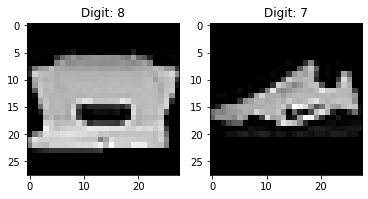

In [5]:
plt.subplot(121)
plt.imshow(train_X[999,:,:], cmap='gray')
plt.title("Digit: {}".format(train_Y[999]))

plt.subplot(122)
plt.imshow(test_X[999,:,:], cmap='gray')
plt.title("Digit: {}".format(test_Y[999]))

### Notes on Fashion-MNIST classes:
- 0: t-shirts, 
- 1: trousers, 
- 2: pullovers, 
- 3: dresses, 
- 4: coats, 
- 5: sandals, 
- 6: shirts, 
- 7: sneakers, 
- 8: bags, 
- 9: ankle boots.

## Using Numpy for data preprocessing...

In [6]:
# -1: the value for this dimension is inferred 
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
print(train_X.shape, test_X.shape)

# convert in float32 (more memory allocated)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# scale to 0-1, note the . after 255 (float)
train_X = train_X / 255.
test_X = test_X / 255.

(60000, 28, 28, 1) (10000, 28, 28, 1)


## ...and Keras

In [7]:
print('y:', train_Y[0])

train_Y = keras.utils.to_categorical(train_Y)
test_Y = keras.utils.to_categorical(test_Y)

print('y in binary representation:', train_Y[0])
print(train_Y.shape)

y: 9
y in binary representation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(60000, 10)


## Your first CNN

You will have to tune the 2 parameters `batch_size` and `epochs` to improve your model.

In [8]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.vis_utils import plot_model

batch_size = 1000 # try other values
epochs = 5 # try other values
num_classes = 10

In [9]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = "sgd",
              metrics='accuracy')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [12]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [17]:
train = model.fit(train_X, train_Y, 
                  batch_size=batch_size, 
                  epochs=epochs,
                  verbose=1, 
                  validation_split = 0.2)

Epoch 1/5
48/48 [==============================] - 15s 304ms/step - loss: 1.0316 - accuracy: 0.6460 - val_loss: 0.9927 - val_accuracy: 0.6465
Epoch 2/5
48/48 [==============================] - 15s 314ms/step - loss: 0.9943 - accuracy: 0.6429 - val_loss: 0.9714 - val_accuracy: 0.6262
Epoch 3/5
48/48 [==============================] - 15s 305ms/step - loss: 0.9533 - accuracy: 0.6547 - val_loss: 0.9611 - val_accuracy: 0.6678
Epoch 4/5
48/48 [==============================] - 15s 306ms/step - loss: 0.9380 - accuracy: 0.6530 - val_loss: 0.9272 - val_accuracy: 0.6864
Epoch 5/5
48/48 [==============================] - 15s 323ms/step - loss: 0.8987 - accuracy: 0.6730 - val_loss: 0.9596 - val_accuracy: 0.6809


In [14]:
model.save("my_model") # save the model (save structure and fit)
del model # delete the model

INFO:tensorflow:Assets written to: path_to_my_model\assets


In [15]:
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model") 

In [14]:
test_eval = model.evaluate(test_X, test_Y, verbose=0)

In [15]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 2.096297025680542
Test accuracy: 0.3296999931335449


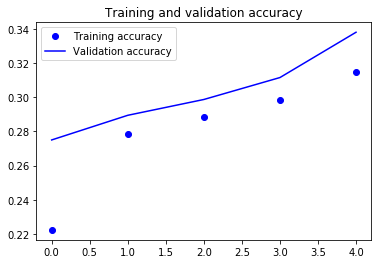

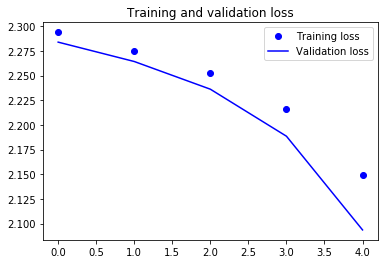

In [16]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Your second CNN

You will have to tune the 2 parameters `batch_size` and `epochs` to improve your model.

In [17]:
batch_size = 1000 #(may be reduced)
epochs = 5 #(may be increased)
num_classes = 10 

## Dropout (controlling for overfitting)

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)         

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="sgd",metrics='accuracy')

In [21]:
train_dropout = model.fit(train_X, train_Y, 
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1, 
                          validation_split = 0.2)

Epoch 1/5
48/48 [==============================] - 19s 378ms/step - loss: 2.3088 - accuracy: 0.1239 - val_loss: 2.2954 - val_accuracy: 0.1944
Epoch 2/5
48/48 [==============================] - 18s 379ms/step - loss: 2.2943 - accuracy: 0.1409 - val_loss: 2.2861 - val_accuracy: 0.2281
Epoch 3/5
48/48 [==============================] - 21s 429ms/step - loss: 2.2829 - accuracy: 0.1545 - val_loss: 2.2761 - val_accuracy: 0.2592
Epoch 4/5
48/48 [==============================] - 21s 439ms/step - loss: 2.2696 - accuracy: 0.1721 - val_loss: 2.2628 - val_accuracy: 0.2752
Epoch 5/5
48/48 [==============================] - 21s 444ms/step - loss: 2.2518 - accuracy: 0.1863 - val_loss: 2.2423 - val_accuracy: 0.2848


As you may see the results are not quite satisfactory in terms of training accuracy... these models are known to easily raise 95% of accuracy, the dropout layer is sensed to avoid overfitting but maybe our model estimation did not converge well. 

Now try to improve both these models and print the results of the second model. First, try to change the values of tuning parameters `batch_size` and `epochs`. Then, once you will get better performance results for both these models, you could propose your own network architecture using fully and locally connected layers.